In [2]:
import numpy as np
import nysg_tools as ny 
import pandas as pd
from math import log10
import pyvisa as visa
import matplotlib.pyplot as plt

In [3]:
rm = visa.ResourceManager()
rm.list_resources()

('USB0::0x0699::0x03C4::C010503::INSTR', 'ASRL1::INSTR', 'ASRL10::INSTR')

In [6]:
osci_name = "USB0::0x0699::0x03C4::C010503::INSTR"
osci = rm.open_resource(osci_name)


In [7]:
from datetime import datetime
def get_osci(additional_info = False, plot=False):
    osci.write("DAT:SOU CH1")
    xze, xin = osci.query_ascii_values('WFMPRE:XZE?;XIN?', separator=';')
    yze1, ymu1, yoff1 = osci.query_ascii_values('WFMPRE:YZE?;YMU?;YOFF?;', separator=';')
    osci.write("DAT:SOU CH2")

    yze2, ymu2, yoff2 = osci.query_ascii_values('WFMPRE:YZE?;YMU?;YOFF?;', separator=';')

    osci.write('DAT:ENC RPB')
    osci.write('DAT:WID 1')

    osci.write("DAT:SOU CH1")
    data1 = osci.query_binary_values('CURV?', datatype='B', container=np.array)

    osci.write("DAT:SOU CH2")
    data2 = osci.query_binary_values('CURV?', datatype='B', container=np.array)

    tiempo = xze + np.arange(len(data1)) * xin

    data1v = (data1 - yoff1) * ymu1 + yze1
    data2v = (data2 - yoff2) * ymu2 + yze2
    
    if plot:
        plt.plot(tiempo,data1v)
        plt.plot(tiempo,data2v)

    if additional_info:
        extra = {"yze1":yze1,"ymu1":ymu1,"yoff1":yoff1,"yze2":yze2,"ymu2":ymu2,"yoff2":yoff2,"datach1raw":data1,"datach2raw":data2}
        return tiempo,data1v,data2v, extra

    return tiempo,data1v,data2v

def osci_autosave(filename,attrs,plot_saved=False):
    t,v1,v2 = get_osci()
    buffer =  pd.DataFrame({"time":t,"VCH1":v1,"VCH2":v2})
    today = datetime.now()
    d1 = today.strftime("%H%M%S")
    buffer.attrs = attrs
    
    buffer.to_csv(f'{filename}{d1}{".csv"}')
    buffer.to_pickle(f'{filename}{d1}')

    if plot_saved:
        plt.plot(t,v1)
        plt.plot(t,v2)


def osci_autosave_simple(filename):
    today = datetime.now()
    d1 = today.strftime("%H%M%S")
    t,v1,v2 = get_osci()
    buffer =  pd.DataFrame({"time":t,"VCH1":v1,"VCH2":v2})
    buffer.to_pickle(f'{filename}{d1}')

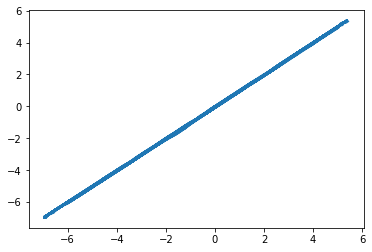

In [ ]:
# t,x,y=get_osci()
# plt.plot(x,y)
# plt.grid()
# osci_autosave_simple("res_swipe/1")

In [ ]:
#arrancaremos amedir desde el rmin hastael rmax, deberiamos observar primero lineas, luego elipses, luegoatractoress, luego nada



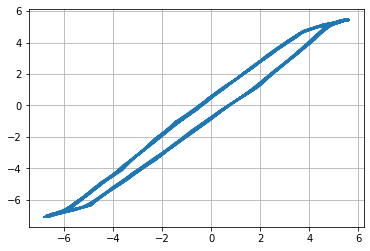

In [ ]:
# t,x,y=get_osci()
# plt.plot(x,y)
# plt.grid()
# osci_autosave_simple("res_swipe/2")

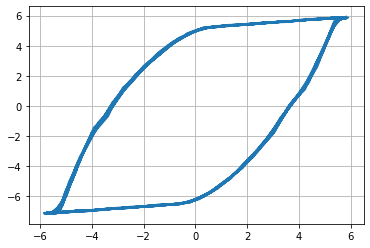

In [ ]:
# t,x,y=get_osci()
# plt.plot(x,y)
# plt.grid()
# osci_autosave_simple("res_swipe/3")

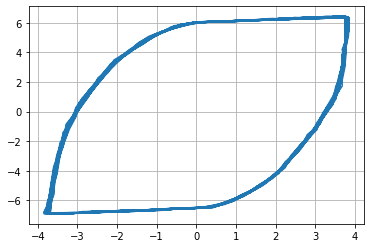

In [ ]:
# t,x,y=get_osci()
# plt.plot(x,y)
# plt.grid()
# osci_autosave_simple("res_swipe/4")

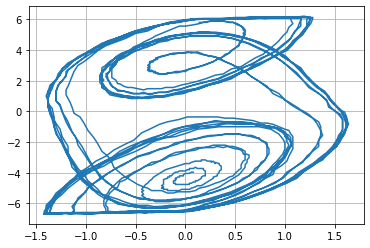

In [ ]:
# t,x,y=get_osci()
# plt.plot(x,y)
# plt.grid()
# osci_autosave_simple("res_swipe/5")

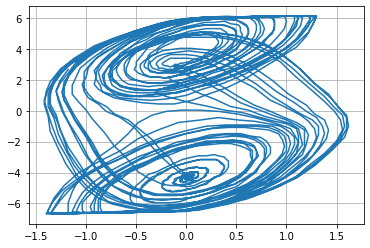

In [ ]:
# t,x,y=get_osci()
# plt.plot(x,y)
# plt.grid()
# osci_autosave_simple("res_swipe/5_moretime")

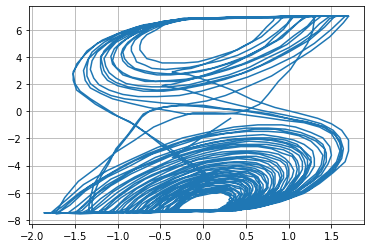

In [ ]:

# t,x,y=get_osci()
# plt.plot(x,y)
# plt.grid()
# osci_autosave_simple("res_swipe/6")

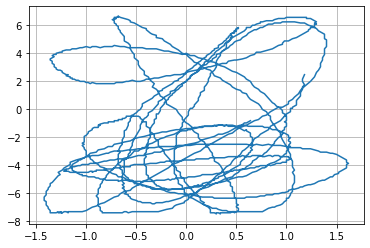

In [ ]:

# t,x,y=get_osci()
# plt.plot(x,y)
# plt.grid()
# osci_autosave_simple("res_swipe/7")

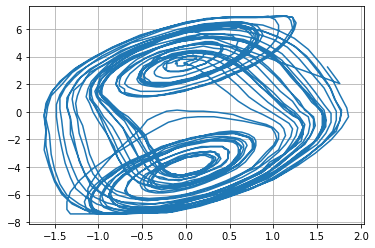

In [45]:

t,x,y=get_osci()
plt.plot(x,y)
plt.grid()
osci_autosave_simple("res_swipe/7_moreres")

In [ ]:
#ahoravamosatratarde buscar el solo1 atractor


In [47]:
date.today()

datetime.date(2024, 11, 19)

In [59]:
d1

'161114'

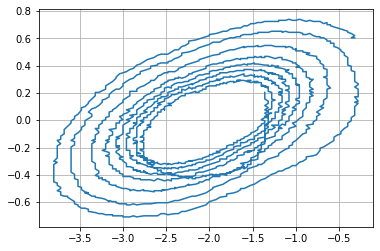

In [ ]:
#t,x,y=get_osci()
#plt.plot(x,y)
#plt.grid()
#osci_autosave_simple("res_swipe/8")
#R_L=1.947 kohm
#R_C=1.959 kohm (es la que vamos a ir variando)

In [ ]:
# a partir de ahora todas las mediciones se realizan con R_L=2.514k



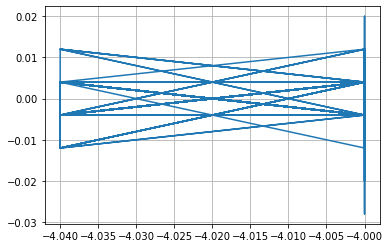

In [ ]:
t,x,y=get_osci()
plt.plot(x,y)
plt.grid()
osci_autosave_simple("bifurc/1med") #nombre de la resistencia en kohm

#med 1 fue realizada con 4.76 k ohm

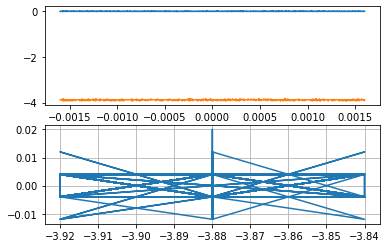

In [ ]:
#fig, ax =plt.subplots(2)

#t,x,y=get_osci()
#ax[0].plot(t,y)
#ax[0].plot(t,x)
#ax[1].plot(x,y)

#plt.grid()
#osci_autosave_simple("bifurc/2med") 

#med 2 fue realizada con 3 k ohm

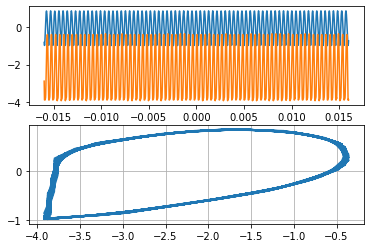

In [ ]:
#Hubo una modificacion y ahora medimos con R_L = 2.516 kohm
# fig, ax =plt.subplots(2)

# t,x,y=get_osci()
# ax[0].plot(t,y)
# ax[0].plot(t,x)
# ax[1].plot(x,y)

# plt.grid()
# osci_autosave_simple("bifurc/3med") 
#med 3 fue realizado con RC = 

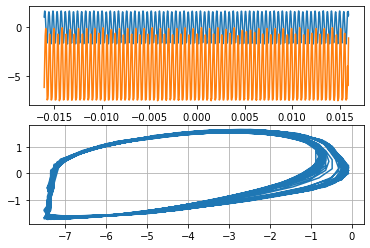

In [ ]:
# fig, ax =plt.subplots(2)

# t,x,y=get_osci()
# ax[0].plot(t,y)
# ax[0].plot(t,x)
# ax[1].plot(x,y)

# plt.grid()
# osci_autosave_simple("bifurc/4med") 
#med 3 fue realizado con RC = 2.089 kohm

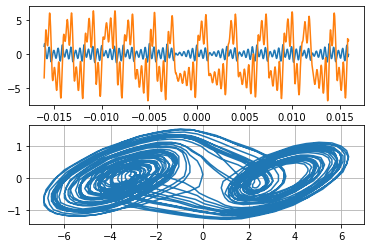

In [ ]:
#Hubo una modificacion y ahora medimos con R_L = 2.516 kohm
# fig, ax =plt.subplots(2)

# t,x,y=get_osci()
# ax[0].plot(t,y)
# ax[0].plot(t,x)
# ax[1].plot(x,y)

# plt.grid()
# osci_autosave_simple("bifurc/5med") 
#med 3 fue realizado con RC = 1.916 k ohm

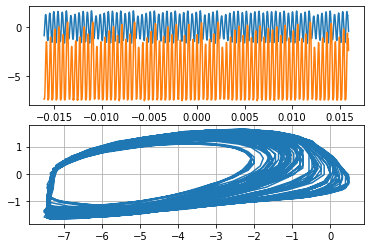

In [ ]:
# fig, ax =plt.subplots(2)

# t,x,y=get_osci()
# ax[0].plot(t,y)
# ax[0].plot(t,x)
# ax[1].plot(x,y)

# plt.grid()
# osci_autosave_simple("bifurc/6med") 
#med 6 fue realizado con RC = 2.074 k ohm

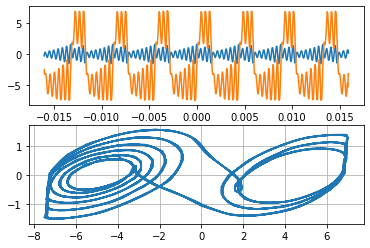

In [ ]:
# fig, ax =plt.subplots(2)

# t,x,y=get_osci()
# ax[0].plot(t,y)
# ax[0].plot(t,x)
# ax[1].plot(x,y)

# plt.grid()
# osci_autosave_simple("bifurc/7med") 
#med 7 fue realizado con RC = 2.033  k ohm

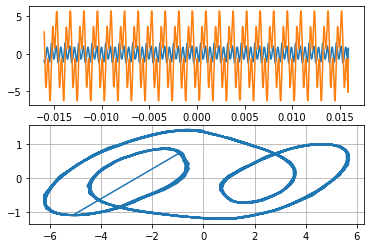

In [ ]:
# fig, ax =plt.subplots(2)

# t,x,y=get_osci()
# ax[0].plot(t,y)
# ax[0].plot(t,x)
# ax[1].plot(x,y)

# plt.grid()
# osci_autosave_simple("bifurc/8med")
#med 8 fue realizado con RC = 1.873 k ohm ; este es un atractor que tiene período cuadruple 

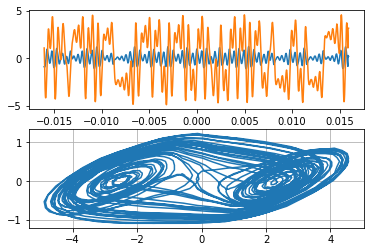

In [ ]:
# fig, ax =plt.subplots(2)

# t,x,y=get_osci()
# ax[0].plot(t,y)
# ax[0].plot(t,x)
# ax[1].plot(x,y)

# plt.grid()
# osci_autosave_simple("bifurc/9med")
# med 9 fue realizado con RC = 1.780

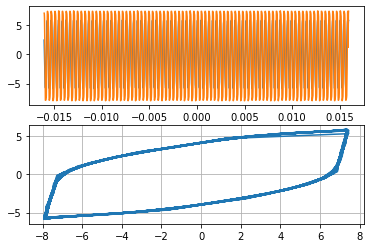

In [ ]:
# fig, ax =plt.subplots(2)

# t,x,y=get_osci()
# ax[0].plot(t,y)
# ax[0].plot(t,x)
# ax[1].plot(x,y)

# plt.grid()
# osci_autosave_simple("bifurc/10med")
# med 10 fue realizado con RC = 1.783 k ohm 

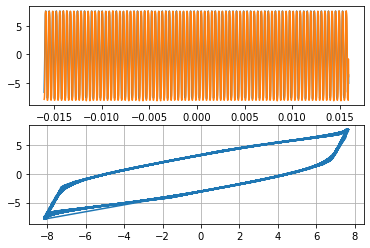

In [ ]:
# fig, ax =plt.subplots(2)

# t,x,y=get_osci()
# ax[0].plot(t,y)
# ax[0].plot(t,x)
# ax[1].plot(x,y)

# plt.grid()
# osci_autosave_simple("bifurc/11med")
# med 11 fue realizado con RC = 1.204 k ohm 

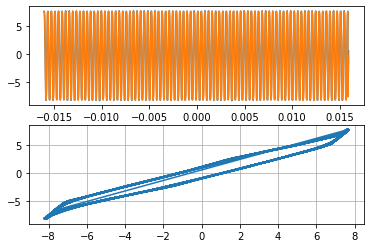

In [ ]:
# fig, ax =plt.subplots(2)

# t,x,y=get_osci()
# ax[0].plot(t,y)
# ax[0].plot(t,x)
# ax[1].plot(x,y)

# plt.grid()
# osci_autosave_simple("bifurc/12med")
# med 12 fue realizado con RC = 0.433 k ohm

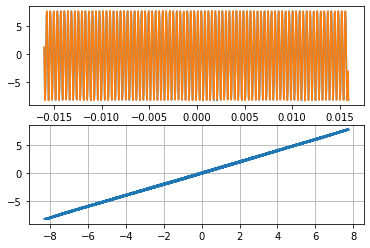

In [ ]:
# fig, ax =plt.subplots(2)

# t,x,y=get_osci()
# ax[0].plot(t,y)
# ax[0].plot(t,x)
# ax[1].plot(x,y)

# plt.grid()
# osci_autosave_simple("bifurc/13med")
# # med 13 fue realizado con RC = 18 ohm

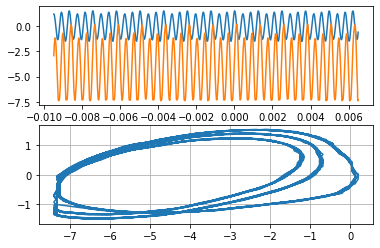

In [5]:
fig, ax =plt.subplots(2)

t,x,y=get_osci()
ax[0].plot(t,y)
ax[0].plot(t,x)
ax[1].plot(x,y)

plt.grid()
osci_autosave_simple("bifurc/14med")
# med 14 fue realizado con RC = 2.071  ohm


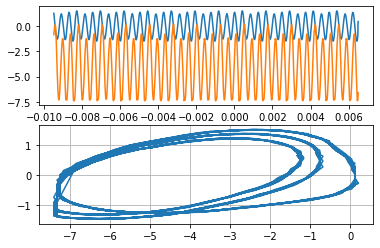

In [6]:
fig, ax =plt.subplots(2)

t,x,y=get_osci()
ax[0].plot(t,y)
ax[0].plot(t,x)
ax[1].plot(x,y)

plt.grid()
osci_autosave_simple("bifurc/15med")
# med 14 fue realizado con RC = 2.071  ohm


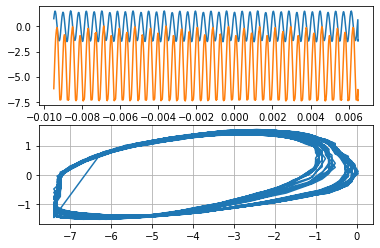

In [8]:
fig, ax =plt.subplots(2)

t,x,y=get_osci()
ax[0].plot(t,y)
ax[0].plot(t,x)
ax[1].plot(x,y)

plt.grid()
osci_autosave_simple("bifurc/16med")

In [ ]:
# Ahypa descubrimos que con la resistencia variable se ve todo mucho mas lindo
# desconectamos el girador y medimos que onda el chua, agregamos una resistencia de 100 ohms y mandamos una señal triangular de 7 vpp a 30 hz


In [27]:
t,V1,V2=get_osci()


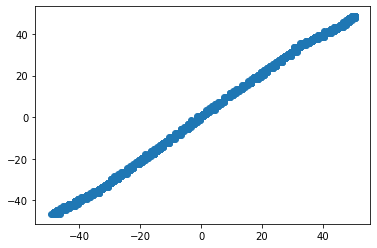

In [37]:
plt.scatter(V1,V2)

In [ ]:
osci_autosave_simple("vvsi",)
#V1 -> Fuente 
# VCH2->VR 
#R100ohm y 30hz con 10vpp

In [40]:
t,V1,V2=get_osci()


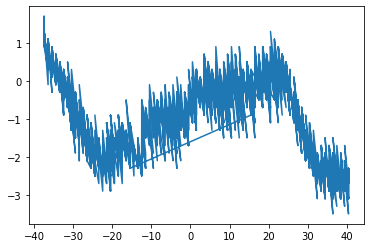

In [45]:
plt.plot(V1,V2-V1)

In [55]:
notloose = [t,V1,V2]

In [54]:
pd.DataFrame(notloose).to_csv("NOPERDER")

In [56]:
pd.DataFrame(notloose)

,0,1,2,3,4,5,6,7,8,9,...,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
0,-0.03296,-0.032928,-0.032896,-0.032864,-0.032832,-0.0328,-0.032768,-0.032736,-0.032704,-0.032672,...,0.03072,0.030752,0.030784,0.030816,0.030848,0.03088,0.030912,0.030944,0.030976,0.031008
1,-1.50000,-1.500000,-1.500000,-1.500000,-0.500000,-1.5000,-1.500000,-0.500000,-0.500000,-0.500000,...,-16.50000,-15.500000,-16.500000,-15.500000,15.500000,15.50000,15.500000,16.500000,15.500000,16.500000
2,-3.00000,-2.600000,-2.200000,-1.800000,-2.200000,-1.8000,-1.800000,-1.400000,-1.400000,-1.000000,...,-17.80000,-17.800000,-17.800000,-17.800000,14.600000,15.00000,15.400000,15.400000,15.400000,15.800000


In [57]:
notloose

[array([-0.03296 , -0.032928, -0.032896, ...,  0.030944,  0.030976,
         0.031008]),
 array([-1.5, -1.5, -1.5, ..., 16.5, 15.5, 16.5]),
 array([-3. , -2.6, -2.2, ..., 15.4, 15.4, 15.8])]